F -> E -> D -> C -> H 0
Distance: 45


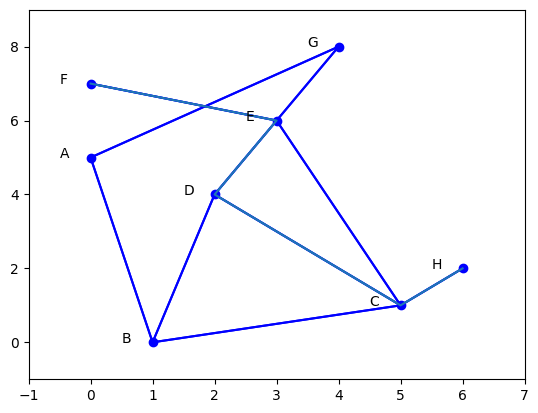

In [14]:
from datetime import datetime
from functools import reduce
import matplotlib.pyplot as plt

# Dict to label points
labels = {1:'A',2:'B',3:'C',4:'D',5:'E',6:'F',7:'G',8:'H'}

# Dict to derive coordinates
coordinates = {
    'A':(0,5),
    'B':(1,0),
    'C':(5,1),
    'D':(2,4),
    'E':(3,6),
    'F':(0,7),
    'G':(4,8),
    'H':(6,2)
}
# Adjacency and State Matrix
adjacency_matrix = [[0, 20, 0, 0, 0, 0, 15, 0],
             [20, 0, 8, 9, 0, 0, 0, 0],
             [0,  8,  0,  6, 15, 0, 0, 10],
             [0, 9, 6, 0, 7, 0, 0, 0],
             [0, 0, 15, 7, 0, 22, 18, 0],
             [0, 0, 0, 0, 22, 0, 0, 0],
             [15, 0, 0, 0, 18, 0, 0, 0],
             [0, 0, 10, 0, 0, 0, 0, 0]]

xCoord=[coordinates[k][0] for k in sorted(coordinates)]
yCoord=[coordinates[k][1] for k in sorted(coordinates)]
plt.plot(xCoord, yCoord, 'bo')
plt.axis([-1, 7, -1, 9])

for i in range(8):
    plt.text(xCoord[i]-0.5, yCoord[i], labels[i+1])
for i in range(8):
    for j in range(8):
        if adjacency_matrix[i][j]:
            plt.plot([xCoord[i], xCoord[j]],[yCoord[i], yCoord[j]], 'b')

def convert_adjacency_matrix(adjacency_matrix):
    graph = {}
    vertices = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
    
    for i in range(len(vertices)):
        vertex = vertices[i]
        neighbors = []
        
        for j in range(len(adjacency_matrix[i])):
            weight = adjacency_matrix[i][j]
            
            if weight != 0:
                neighbor = vertices[j]
                neighbors.append((neighbor, weight))
        
        graph[vertex] = neighbors
    
    return graph

# Dijkstra Algorithm
def dijkstra(graph, start, target):
    infinity = reduce(lambda x,y: x+y, (i[1] for u in graph for i in graph[u]))
    dist = dict.fromkeys(graph, infinity)
    prev = dict.fromkeys(graph)
    q = list(graph)

    dist[start] = 0
    while q:
        u = min(q, key=lambda x: dist[x])
        q.remove(u)
        for v,w in graph[u]:
            alt = dist[u] + w
            if alt < dist[v]:
                dist[v] = alt
                prev[v] = u
    # "way"
    trav = []
    temp = target
    while temp != start:
        trav.append(prev[temp])
        temp = prev[temp]
    trav.reverse()
    trav.append(target)
    return " -> ".join(trav),dist[target]

graph = convert_adjacency_matrix(adjacency_matrix)
# print(graph)
start_time = datetime.now().microsecond
traverse, dist = dijkstra(graph,'F','H')
print(traverse, datetime.now().microsecond - start_time)

# Drawing of coordinates
mydrawing = traverse.split('-> ')
plt.plot([coordinates[n.rstrip()][0] for n in mydrawing], [coordinates[n.rstrip()][1] for n in mydrawing])
print("Distance:", dist)
plt.show()

In [6]:
# https://www.geeksforgeeks.org/python-program-for-dijkstras-shortest-path-algorithm-greedy-algo-7/

# Python program for Dijkstra's single
# source shortest path algorithm. The program is
# for adjacency matrix representation of the graph
class Graph():
 
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0 for column in range(vertices)]
                      for row in range(vertices)]
 
    def printSolution(self, dist):
        print("Vertex \t Distance from Source")
        for node in range(self.V):
            print(node, "\t\t", dist[node])
 
    # A utility function to find the vertex with
    # minimum distance value, from the set of vertices
    # not yet included in shortest path tree
    def minDistance(self, dist, sptSet):
 
        # Initialize minimum distance for next node
        min = 1e7
 
        # Search not nearest vertex not in the
        # shortest path tree
        for v in range(self.V):
            if dist[v] < min and sptSet[v] == False:
                min = dist[v]
                min_index = v
 
        return min_index
 
    # Function that implements Dijkstra's single source
    # shortest path algorithm for a graph represented
    # using adjacency matrix representation
    def dijkstra(self, src):
 
        dist = [1e7] * self.V
        dist[src] = 0
        sptSet = [False] * self.V
 
        for cout in range(self.V):
 
            # Pick the minimum distance vertex from
            # the set of vertices not yet processed.
            # u is always equal to src in first iteration
            u = self.minDistance(dist, sptSet)
 
            # Put the minimum distance vertex in the
            # shortest path tree
            sptSet[u] = True
 
            # Update dist value of the adjacent vertices
            # of the picked vertex only if the current
            # distance is greater than new distance and
            # the vertex in not in the shortest path tree
            for v in range(self.V):
                if (self.graph[u][v] > 0 and
                   sptSet[v] == False and
                   dist[v] > dist[u] + self.graph[u][v]):
                    dist[v] = dist[u] + self.graph[u][v]
 
        self.printSolution(dist)

In [7]:
# Driver program
g = Graph(9)
g.graph = [[0, 4, 0, 0, 0, 0, 0, 8, 0],
           [4, 0, 8, 0, 0, 0, 0, 11, 0],
           [0, 8, 0, 7, 0, 4, 0, 0, 2],
           [0, 0, 7, 0, 9, 14, 0, 0, 0],
           [0, 0, 0, 9, 0, 10, 0, 0, 0],
           [0, 0, 4, 14, 10, 0, 2, 0, 0],
           [0, 0, 0, 0, 0, 2, 0, 1, 6],
           [8, 11, 0, 0, 0, 0, 1, 0, 7],
           [0, 0, 2, 0, 0, 0, 6, 7, 0]
           ]
 
g.dijkstra(0)

Vertex 	 Distance from Source
0 		 0
1 		 4
2 		 12
3 		 19
4 		 21
5 		 11
6 		 9
7 		 8
8 		 14
